In [1]:
import pandas as pd
from matplotlib import pyplot as plt
price = pd.read_csv('./data/onion_price.csv')
path = 'data/onion_supply/onion'
product = pd.read_excel('./data/onion_area.xlsx')
im_ex_port = pd.read_csv('./data/onion_monthly_im_ex_port.csv', encoding='euc-kr')


price['년도'] = price['년도'].apply(lambda x: str(x))
price['월'] = price['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

supply = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# supply = supply[2:]
supply['년도'] = supply['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
supply['월'] = supply['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
supply['거래량'] = supply['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int)
product['년도'] = product['년도'].apply(lambda x: str(x))

im_ex_port['년도'] = im_ex_port['년도'].apply(lambda x: str(x))
im_ex_port['수출(중량)'] = im_ex_port['수출(중량)'].apply(lambda x: str(x))
im_ex_port['수입(중량)'] = im_ex_port['수입(중량)'].apply(lambda x: str(x))
im_ex_port['월'] = im_ex_port['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))

In [2]:
price.head()

,년도,월,가격
0,2000,01,479
1,2000,02,516
2,2000,03,744
3,2000,04,953
4,2000,05,616


In [3]:
supply.head()

,거래년월일,품목명,시장코드,시장명,출하지코드,출하지명,거래량,품목코드,년도,월
0,총 합계,전체,NaN,NaN,NaN,NaN,109008214,NaN,총 합계,
1,소계,양파(일반),NaN,NaN,NaN,NaN,109008214,120101.0,소계,
2,20001230,양파(일반),110001.0,서울가락도매시장,232000,강원도평창군,6960,120101.0,2000,12
3,20001230,양파(일반),110001.0,서울가락도매시장,770000,경상북도영천시,29090,120101.0,2000,12
4,20001230,양파(일반),110001.0,서울가락도매시장,525000,전라남도함평군,40731,120101.0,2000,12


In [4]:
product.head()

,년도,양파:면적 (ha),10a당 생산량 (kg),생산량 (톤)
0,2000,16773,5232,877514
1,2001,18995,5653,1073708
2,2002,15314,6093,933095
3,2003,12352,6033,745203
4,2004,15563,6090,947797


In [5]:
im_ex_port.head()

,년도,월,수출(중량),수입(중량)
0,2010,01,197804.0,230808.0
1,2010,02,120878.1,778786.0
2,2010,03,30478.5,297095.0
3,2010,04,206.5,6244403.0
4,2010,05,2166.0,2038736.0


In [6]:
product_10 = product[product['년도']>'2009']
supply_10 = supply[supply['년도']>'2009'].dropna().reset_index(drop=True)
price_10 = price[price['년도']>'2009']

In [7]:
sup_total = supply_10.groupby(['년도','월'], as_index=False).sum()
sup_total.head()

,년도,월,시장코드,거래량,품목코드
0,2010,01,134917343.0,6546011,72060600.0
1,2010,02,112487017.0,5685678,60050500.0
2,2010,03,158729692.0,7940150,84190801.0
3,2010,04,304114356.0,11931252,158773522.0
4,2010,05,394436908.0,22642986,208975740.0


In [8]:
df2 = im_ex_port.loc[111:]
im_ex_port.loc[111] = ['2019','04','0','0']
im_ex_port = im_ex_port[:112]
im_ex_port = pd.concat([im_ex_port, df2])
im_ex_port = im_ex_port[:-3] 
im_ex_port

,년도,월,수출(중량),수입(중량)
0,2010,01,197804.0,230808.0
1,2010,02,120878.1,778786.0
2,2010,03,30478.5,297095.0
3,2010,04,206.5,6244403.0
4,2010,05,2166.0,2038736.0
...,...,...,...,...
114,2019,08,6308832.7,1317767.7
115,2019,09,3558273.8,2537696.5
116,2019,10,5975115.1,1703417.9
117,2019,11,1559163.7,3124847.0


In [9]:
df = pd.merge(price_10, sup_total, on=['년도','월'])
df

,년도,월,가격,시장코드,거래량,품목코드
0,2010,01,603,134917343.0,6546011,72060600.0
1,2010,02,658,112487017.0,5685678,60050500.0
2,2010,03,914,158729692.0,7940150,84190801.0
3,2010,04,1505,304114356.0,11931252,158773522.0
4,2010,05,959,394436908.0,22642986,208975740.0
...,...,...,...,...,...,...
115,2019,08,500,474837073.0,11930394,217623012.0
116,2019,09,539,380078208.0,12329636,174506753.0
117,2019,10,521,435523559.0,13598455,200328468.0
118,2019,11,605,401731531.0,12481686,186276651.0


In [10]:
merged = pd.merge(df, im_ex_port,on=['년도','월'])
merged = merged[['년도','월','가격','거래량','수출(중량)', '수입(중량)']]

merged['거래월'] = merged[['년도','월']].apply(lambda x: '-'.join(x), axis=1)
merged.to_csv('onion_for_predict.csv',index=False)

In [11]:
# merged.groupby(['년도','월']).sum()
x = merged['거래월']
y1 = merged['가격']
y2 = merged['거래량']
y3 = merged['수출(중량)']
y4 = merged['수입(중량)']
merged

,년도,월,가격,거래량,수출(중량),수입(중량),거래월
0,2010,01,603,6546011,197804.0,230808.0,2010-01
1,2010,02,658,5685678,120878.1,778786.0,2010-02
2,2010,03,914,7940150,30478.5,297095.0,2010-03
3,2010,04,1505,11931252,206.5,6244403.0,2010-04
4,2010,05,959,22642986,2166.0,2038736.0,2010-05
...,...,...,...,...,...,...,...
115,2019,08,500,11930394,6308832.7,1317767.7,2019-08
116,2019,09,539,12329636,3558273.8,2537696.5,2019-09
117,2019,10,521,13598455,5975115.1,1703417.9,2019-10
118,2019,11,605,12481686,1559163.7,3124847.0,2019-11


C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44036 missing from current font.
  font.

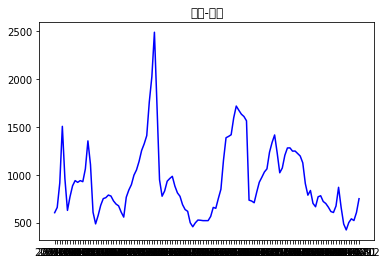

In [12]:
plt.title("시간-가격")
plt.plot(x,y1,'b')
plt.show()

C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  fon

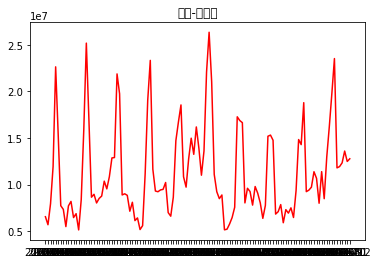

In [13]:
plt.title("시간-거래량")
plt.plot(x,y2,'r')
plt.show()

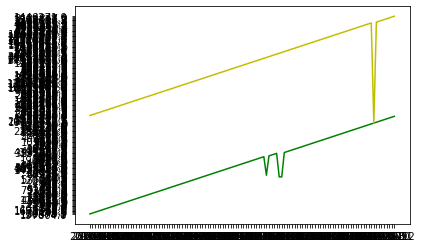

In [14]:
plt.plot(x,y3,'g', label='export') # 수출
plt.plot(x,y4,'y', label='import') # 수입
plt.show()

# pepper

In [15]:
price = pd.read_csv('./data/pepper_price.csv')
path = 'data/pepper_supply/pepper'
product = pd.read_excel('./data/pepper_area.xlsx')
im_ex_port = pd.read_csv('./data/pepper_monthly_im_ex_port.csv', encoding='euc-kr')

In [16]:
price['년도'] = price['년도'].apply(lambda x: str(x))
price['월'] = price['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

supply = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# supply = supply[2:]
supply['년도'] = supply['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
supply['월'] = supply['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
supply['거래량'] = supply['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int)
product['년도'] = product['년도'].apply(lambda x: str(x))

im_ex_port['년도'] = im_ex_port['년도'].apply(lambda x: str(x))
im_ex_port['수출(중량)'] = im_ex_port['수출(중량)'].apply(lambda x: str(x))
im_ex_port['수입(중량)'] = im_ex_port['수입(중량)'].apply(lambda x: str(x))
im_ex_port['월'] = im_ex_port['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))

In [17]:
product_10 = product[product['년도']>'2009']
supply_10 = supply[supply['년도']>'2009'].dropna().reset_index(drop=True)
price_10 = price[price['년도']>'2009']
sup_total = supply_10.groupby(['년도','월'], as_index=False).sum()
im_ex_port.tail(20)

,년도,월,수출(중량),수입(중량)
102,2018,07,200762.5,16012859.2
103,2018,08,174921.4,14936428.4
104,2018,09,237251.9,15840892.6
105,2018,10,316438.9,23482210.2
106,2018,11,296605.0,25831139.2
107,2018,12,311990.0,22770925.9
108,2019,01,355138.7,24218564.5
109,2019,02,242623.1,15985540.7
110,2019,03,304769.1,19092893.5
111,2019,05,293037.0,19850546.1


In [18]:
df2 = im_ex_port.loc[111:]
im_ex_port.loc[111] = ['2019','04','0','0']
im_ex_port = im_ex_port[:112]
im_ex_port = pd.concat([im_ex_port, df2])
im_ex_port = im_ex_port[:-3] 

In [19]:
df = pd.merge(price_10, sup_total, on=['년도','월'])
merged = pd.merge(df, im_ex_port,on=['년도','월'])
merged2 = merged[['년도','월','가격','거래량','수출(중량)', '수입(중량)']]

merged2['거래월'] = merged2[['년도','월']].apply(lambda x: '-'.join(x), axis=1)
merged2

C:\Users\dl\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,년도,월,가격,거래량,수출(중량),수입(중량),거래월
0,2010,01,11957,29953,238133.0,11580818.0,2010-01
1,2010,02,11900,5322,240883.2,14753256.0,2010-02
2,2010,03,11900,6754,250385.4,11453169.0,2010-03
3,2010,04,11894,3421,221121.8,11435557.0,2010-04
4,2010,05,11833,11912,246000.1,9414677.0,2010-05
...,...,...,...,...,...,...,...
115,2019,08,20445,53650,334165.8,18476056.6,2019-08
116,2019,09,19895,45879,234067.7,13130662.3,2019-09
117,2019,10,18825,57138,306206.5,22168836.4,2019-10
118,2019,11,18698,17042,357145.6,27486727.0,2019-11


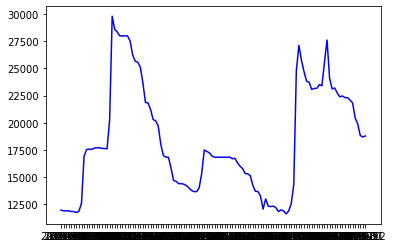

In [20]:
x = merged2['거래월']
y1 = merged2['가격']
y2 = merged2['거래량']
y3 = merged2['수출(중량)']
y4 = merged2['수입(중량)']
plt.plot(x,y1,'b')
plt.show()

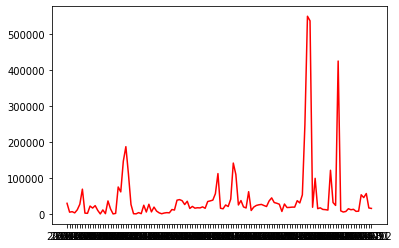

In [21]:
plt.plot(x,y2,'r')
plt.show()

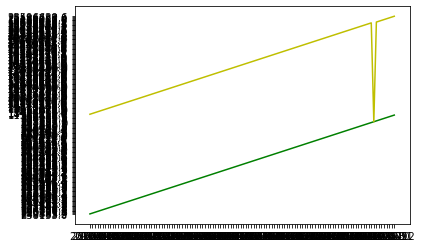

In [22]:
plt.plot(x,y3,'g', label='export') # 수출
plt.plot(x,y4,'y', label='import') # 수입
plt.show()

# garlic

In [23]:
price = pd.read_csv('./data/garlic_price.csv')
path = 'data/garlic_supply/garlic'
product = pd.read_excel('./data/garlic_area.xlsx')
im_ex_port = pd.read_csv('./data/garlic_monthly_im_ex_port.csv', encoding='euc-kr')

In [24]:
price['년도'] = price['년도'].apply(lambda x: str(x))
price['월'] = price['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

supply = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# supply = supply[2:]
supply['년도'] = supply['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
supply['월'] = supply['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
supply['거래량'] = supply['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int)
product['년도'] = product['년도'].apply(lambda x: str(x))

im_ex_port['년도'] = im_ex_port['년도'].apply(lambda x: str(x))
im_ex_port['수출(중량)'] = im_ex_port['수출(중량)'].apply(lambda x: str(x))
im_ex_port['수입(중량)'] = im_ex_port['수입(중량)'].apply(lambda x: str(x))
im_ex_port['월'] = im_ex_port['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))

In [25]:
product_10 = product[product['년도']>'2009']
supply_10 = supply[supply['년도']>'2009'].dropna().reset_index(drop=True)
price_10 = price[price['년도']>'2009']
sup_total = supply_10.groupby(['년도','월'], as_index=False).sum()
im_ex_port.tail(20)

,년도,월,수출(중량),수입(중량)
102,2018,07,1701.8,3090846.4
103,2018,08,3094.1,8072090.1
104,2018,09,4534.1,2931798.4
105,2018,10,2798.0,2787831.7
106,2018,11,7066.2,3138825.0
107,2018,12,4402.3,2383980.4
108,2019,01,23404.0,3394382.2
109,2019,02,3382.9,10107707.1
110,2019,03,4655.7,2120811.1
111,2019,05,5427.9,3502290.4


In [26]:
df2 = im_ex_port.loc[111:]
im_ex_port.loc[111] = ['2019','04','0','0']
im_ex_port = im_ex_port[:112]
im_ex_port = pd.concat([im_ex_port, df2])
im_ex_port = im_ex_port[:-3] 

In [27]:
df = pd.merge(price_10, sup_total, on=['년도','월'])
merged = pd.merge(df, im_ex_port,on=['년도','월'])
merged2 = merged[['년도','월','가격','거래량','수출(중량)', '수입(중량)']]

merged2['거래월'] = merged2[['년도','월']].apply(lambda x: '-'.join(x), axis=1)
merged2

C:\Users\dl\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,년도,월,가격,거래량,수출(중량),수입(중량),거래월
0,2010,01,2741,49425,4172.9,1823871.0,2010-01
1,2010,02,2823,30682,8397.0,2388547.0,2010-02
2,2010,03,2741,9048,8147.0,1401952.0,2010-03
3,2010,04,2725,2919,6122.7,3854173.0,2010-04
4,2010,05,3326,326311,5535.0,1697612.0,2010-05
...,...,...,...,...,...,...,...
115,2019,08,3451,76694,688367.8,6748621.2,2019-08
116,2019,09,3320,32157,212958.5,1585672.6,2019-09
117,2019,10,3320,12839,355158.1,1889134.1,2019-10
118,2019,11,3341,21851,273592.4,2037108.7,2019-11


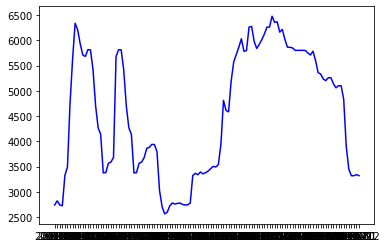

In [28]:
x = merged2['거래월']
y1 = merged2['가격']
y2 = merged2['거래량']
y3 = merged2['수출(중량)']
y4 = merged2['수입(중량)']
plt.plot(x,y1,'b')
plt.show()

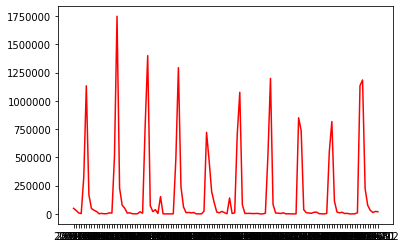

In [29]:
plt.plot(x,y2,'r')
plt.show()

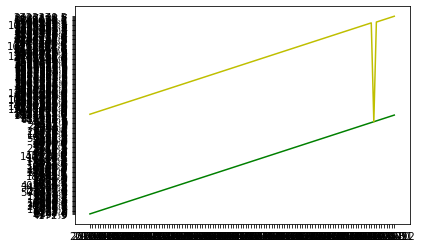

In [30]:
plt.plot(x,y3,'g', label='export') # 수출
plt.plot(x,y4,'y', label='import') # 수입
plt.show()